In [2]:
import torch
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline, StableDiffusionInpaintPipelineLegacy, DDIMScheduler, AutoencoderKL
from PIL import Image

from ip_adapter import IPAdapter

base_model_path = "runwayml/stable-diffusion-v1-5"
vae_model_path = "stabilityai/sd-vae-ft-mse"
image_encoder_path = r"C:\Users\Aakhil\Desktop\hackathons\bolt\ComfyUI_windows_portable\ComfyUI\scripts\IP-Adapter\models\image_encoder"
ip_ckpt = r"C:\Users\Aakhil\Desktop\hackathons\bol  t\ComfyUI_windows_portable\ComfyUI\scripts\IP-Adapter\models\ip-adapter_sd15.bin"
device = "cuda"

c:\Users\Aakhil\anaconda3\envs\bolt\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Aakhil\anaconda3\envs\bolt\Lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [3]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [10]:
# load SD Inpainting pipe
#del pipe, ip_model
noise_scheduler = DDIMScheduler(
    num_train_timesteps=1000,
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule="scaled_linear",
    clip_sample=False,
    set_alpha_to_one=False,
    steps_offset=1,
)
vae = AutoencoderKL.from_pretrained(vae_model_path).to(dtype=torch.float16)
pipe = StableDiffusionInpaintPipelineLegacy.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    scheduler=noise_scheduler,
    vae=vae,
    feature_extractor=None,
    safety_checker=None
)

diffusion_pytorch_model.safetensors: 100%|██████████| 335M/335M [00:47<00:00, 7.10MB/s] 
Loading pipeline components...: 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]
c:\Users\Aakhil\anaconda3\envs\bolt\Lib\site-packages\diffusers\pipelines\deprecated\stable_diffusion_variants\pipeline_stable_diffusion_inpaint_legacy.py:141: FutureWarning: The class <class 'diffusers.pipelines.deprecated.stable_diffusion_variants.pipeline_stable_diffusion_inpaint_legacy.StableDiffusionInpaintPipelineLegacy'> is deprecated and will be removed in v1.0.0. You can achieve exactly the same functionalityby loading your model into `StableDiffusionInpaintPipeline` instead. See https://github.com/huggingface/diffusers/pull/3533for more information.
  deprecate("legacy is outdated", "1.0.0", deprecation_message, standard_warn=False)
You have disabled the safety checker for <class 'diffusers.pipelines.deprecated.stable_diffusion_variants.pipeline_stable_diffusion_inpaint_legacy.StableDiffusionInpaintPipelineLegac

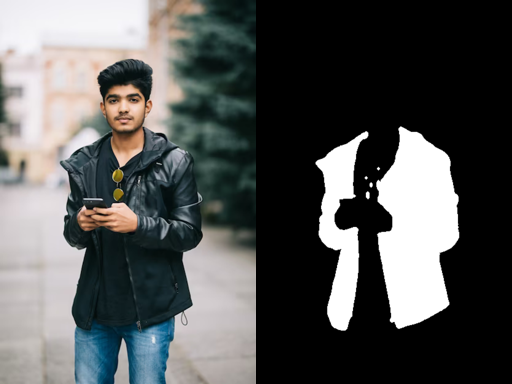

In [12]:
# read image prompt
image = Image.open(r"C:\Users\Aakhil\Desktop\hackathons\bolt\ComfyUI_windows_portable\ComfyUI\scripts\jacket.jpg")
image.resize((256, 256))
masked_image = Image.open(r"C:\Users\Aakhil\Desktop\hackathons\bolt\ComfyUI_windows_portable\ComfyUI\scripts\mask_image.png").resize((512, 768))
mask = Image.open(r"C:\Users\Aakhil\Desktop\hackathons\bolt\ComfyUI_windows_portable\ComfyUI\scripts\mask.png").resize((512, 768))
image_grid([masked_image.resize((256, 384)), mask.resize((256, 384))], 1, 2)

In [13]:
ip_model = IPAdapter(pipe, image_encoder_path, ip_ckpt, device)

100%|██████████| 7/7 [00:40<00:00,  5.85s/it]


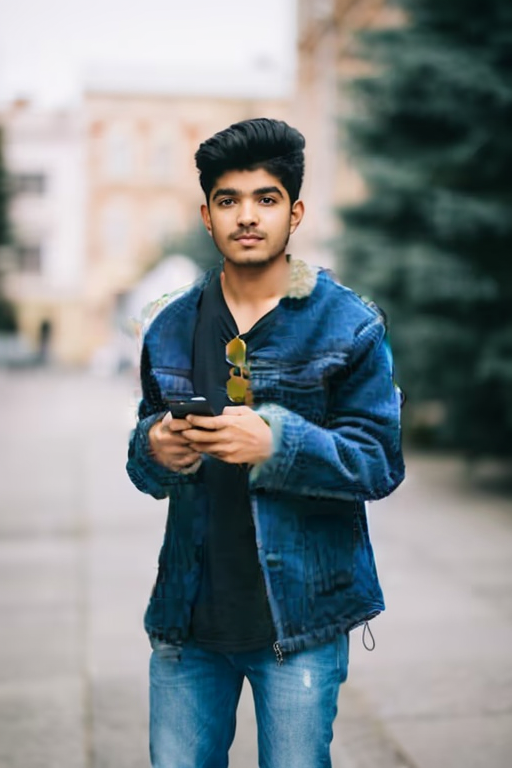

In [16]:
# generate
images = ip_model.generate(pil_image=image, num_samples=1, num_inference_steps=10,
                           seed=42, image=masked_image, mask_image=mask, strength=0.7, )
grid = image_grid(images, 1, 1)
grid